In [11]:
#Выяснить какие пользователи дропнулись с курса
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
events_data = pd.read_csv('C:/Users/Asus/Desktop/NEURAL_NETWORKS/Pandas/StepikTask/event_data_train.csv')

In [7]:
events_data

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
...,...,...,...,...
3480698,33375,1526772685,viewed,11677
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198


In [8]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit = 's')

In [9]:
events_data['day'] = events_data.date.dt.date

In [10]:
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [73]:
submissions_data = pd.read_csv('C:/Users/Asus/Desktop/NEURAL_NETWORKS/Pandas/StepikTask/submissions_data_train.csv')

In [74]:
users_scores = submissions_data.pivot_table(index = 'user_id',
                                          columns = 'submission_status',
                                          values = 'step_id',
                                          aggfunc = 'count',
                                          fill_value = 0).reset_index()

In [ ]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset = ['user_id', 'day']) \
            .groupby('user_id')['timestamp'].apply(list) \
            .apply(np.diff).values

In [12]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset = ['user_id', 'day']) \
            .groupby('user_id')['timestamp'].apply(list) \
            .apply(np.diff).values

In [13]:
gap_data

array([array([], dtype=int32), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
          98252,    57019]),
       array([1567990]), array([], dtype=int32)], dtype=object)

In [14]:
gap_data = pd.Series(np.concatenate(gap_data, axis = 0))

In [15]:
gap_data

0         4843602
1         6899249
2          182484
3           93710
4         2768870
           ...   
97867    14347289
97868      505061
97869       98252
97870       57019
97871     1567990
Length: 97872, dtype: int32

In [20]:
gap_data = gap_data / (24 * 60 * 60)

In [21]:
gap_data

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

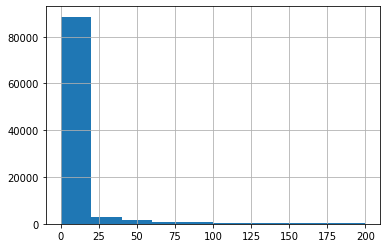

In [22]:
gap_data[gap_data<200].hist()

In [ ]:
#Человек считается дропнувшимся если он более 30 дней не появлялся на курсе!!!

In [23]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [27]:
users_data = events_data.groupby('user_id', as_index = False) \
            .agg({'timestamp' : 'max'}).rename(columns = 
                                              {
                                                  'timestamp' : 'last_timestamp'
                                              })

In [25]:
30 * 24 * 60 *60

2592000

In [29]:
users_data['is_gone_user'] = 1526772811 - users_data.last_timestamp

In [33]:
now = 1526772811
drop_out_threshold = 2592000

In [35]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threshold

In [69]:
print('%.2f percent of users left the course!'  % (users_data.query('is_gone_user == True')['user_id'].nunique() / users_data['user_id'].nunique() * 100))

92.77 percent of users left the course!


In [71]:
print('%.2f percent of users complited the course!' % (users_data.query('is_gone_user == False')['user_id'].nunique() / users_data['user_id'].nunique() * 100))

7.23 percent of users complited the course!


In [81]:
#Соединим две таблицы (по умолчанию стлит inner merge или inner join)
users_data = users_data.merge(users_scores, on = 'user_id', how = 'outer')

In [83]:
#fillna(0) заолняет нулями NaN 
users_data.fillna(0)

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,0.0,0.0
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0


In [84]:
users_events_data = events_data.pivot_table(index = 'user_id', columns = 'action', values = 'step_id', aggfunc = 'count', fill_value = 0).reset_index()

In [85]:
users_events_data

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


In [86]:
users_data = users_data.merge(users_events_data, how = 'outer')

In [87]:
#Получаем историю действий пользователя
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,NaN,NaN,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,NaN,NaN,1,1,0,1
...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9
19230,26793,1510225034,True,NaN,NaN,1,0,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180
19232,26797,1509995096,True,2.0,0.0,10,10,2,13


In [103]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [104]:
#Сколько дней юзер посещал курс
users_days

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
...,...,...
19229,26790,4
19230,26793,1
19231,26794,9
19232,26797,2


In [107]:
users_data = users_data.merge(users_days, how = 'outer')

In [108]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,NaN,NaN,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,NaN,NaN,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4
19230,26793,1510225034,True,NaN,NaN,1,0,1,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2


In [109]:
users_data.user_id.nunique()

19234

In [110]:
events_data.user_id.nunique()

19234

In [113]:
#Как видим мы никого не потеряли!
users_data.user_id.nunique() == events_data.user_id.nunique()

True

In [114]:
#Посмотрим кто из пользователей прошел курс
users_data['passed_corse'] = users_data.passed > 170

In [116]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse
0,1,1472827464,True,NaN,NaN,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,NaN,NaN,1,1,0,1,1,False


In [117]:
users_data.groupby('passed_corse').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_corse,,,,,,,,,,
False,17809,17809,17809,8515,8515,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [122]:
print('%.2f percent of users passed the course!' % (users_data[users_data.passed_corse == True]['user_id'].nunique() / users_data['user_id'].nunique() * 100))

7.41 percent of users passed the course!


In [124]:
print('%.2f percent of users did not pass the course!' % (users_data[users_data.passed_corse == False]['user_id'].nunique() / users_data['user_id'].nunique()*100))

92.59 percent of users did not pass the course!


In [162]:
users_data.groupby('passed_corse').count().reset_index()

,passed_corse,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,False,17809,17809,17809,8515,8515,17809,17809,17809,17809,17809
1,True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [170]:
statistics = pd.DataFrame({'user_id':users_data['user_id'], 'passed': users_data['passed_corse']})

In [173]:
statistics

,user_id,passed
0,1,False
1,2,False
2,3,False
3,5,False
4,7,False
...,...,...
19229,26790,False
19230,26793,False
19231,26794,False
19232,26797,False
